In [ ]:
library(BUSpaRse)
library(here)
library(Matrix)
library(tidyverse)
library(Seurat)
library(ggpointdensity)
library(scico)
library(scales)
library(DropletUtils)
library(reticulate)
library(repr)
library(DoubletFinder)
library(future)
library(RColorBrewer)
options(future.globals.maxSize = 100000 * 1024^2)

proto_genes=read.csv("../data/bulk_data/protoplasting.csv")
proto_list=as.character(proto_genes[abs(proto_genes$logFC) > 4,]$genes)

In [ ]:
# THIS IS THE PREPROCESSING TO GET TO THE INTEGRATED SEURAT OBJECT. JUST UNCOMMENT ENTIRE CELL.
wt_1_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_26_combined.rds")
wt_2_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_67.rds")
mut_1_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_27_combined.rds")
mut_2_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_68.rds")
YFP_1_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_101.rds")
YFP_2_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_103.rds")
KE_1_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_102.rds")
KE_2_seu = readRDS(file = "../data/seurat_objects/seurat_raw_3_11_21/sc_104.rds")

In [ ]:
merged = merge(wt_1_seu, y = c(wt_2_seu, mut_1_seu, mut_2_seu, YFP_1_seu, YFP_2_seu, KE_1_seu, KE_2_seu), project = "abscission")

In [ ]:
ab_sct = SCTransform(merged, vars.to.regress = c("experiment", "geno", "percent.mito") , verbose = TRUE)

In [ ]:
saveRDS(ab_sct, file = paste("../data/seurat_objects/seurat_raw_3_11_21/", "ab_sct_5_13_21", ".rds", sep=""))

In [ ]:
ab_sct <- RunPCA(ab_sct, verbose = FALSE)
ab_sct <- RunUMAP(ab_sct, dims = 1:50, verbose = FALSE)

ab_sct <- FindNeighbors(ab_sct, dims = 1:50, verbose = FALSE)
ab_sct <- FindClusters(ab_sct, verbose = FALSE)

In [ ]:
options(repr.plot.width=12, repr.plot.height=12)
DimPlot(ab_sct, label = TRUE) + NoLegend()

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
#haesa
FeaturePlot(ab_sct, features = c("AT4G28490"),  pt.size = 1, order = TRUE, split.by = "geno", min = 1)# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")

#qrt2
FeaturePlot(ab_sct, features = c("AT3G07970"),   pt.size = 1, order = TRUE, split.by = "geno", min = 1)# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")


#pgazat
FeaturePlot(ab_sct, features = c("AT2G41850"),  pt.size = 1, order = TRUE)#, split.by = "geno")#, slot = "data")

#myb62
FeaturePlot(ab_sct, features = c("AT1G68320"),  pt.size = 1, order = TRUE)#, split.by = "geno")#, slot = "data")

#ppg
FeaturePlot(ab_sct, features = c("AT3G59850"),  pt.size = 1, order = TRUE)#, split.by = "geno")#, slot = "data")

#gdsl
FeaturePlot(ab_sct, features = c("AT5G03820"),  pt.size = 1, order = TRUE)#, split.by = "geno")#, slot = "data")


In [ ]:
Idents(ab_sct) <- "experiment"
DimPlot(ab_sct, reduction = "umap", split.by = "experiment")

In [ ]:
merged_wt = merge(wt_1_seu, y = c(wt_2_seu, YFP_1_seu, YFP_2_seu), project = "abscission")

In [ ]:
wt_sct = SCTransform(merged_wt, vars.to.regress = c("experiment", "percent.mito") , verbose = TRUE)
saveRDS(wt_sct, file = paste("../data/seurat_objects/seurat_raw_3_11_21/", "wt_sct_5_13_21", ".rds", sep=""))

In [33]:
wt_sct <- RunPCA(wt_sct, verbose = FALSE)
wt_sct<- RunUMAP(wt_sct, dims = 1:50, verbose = FALSE)

wt_sct <- FindNeighbors(wt_sct, dims = 1:50, verbose = FALSE)
wt_sct <- FindClusters(wt_sct, verbose = FALSE)

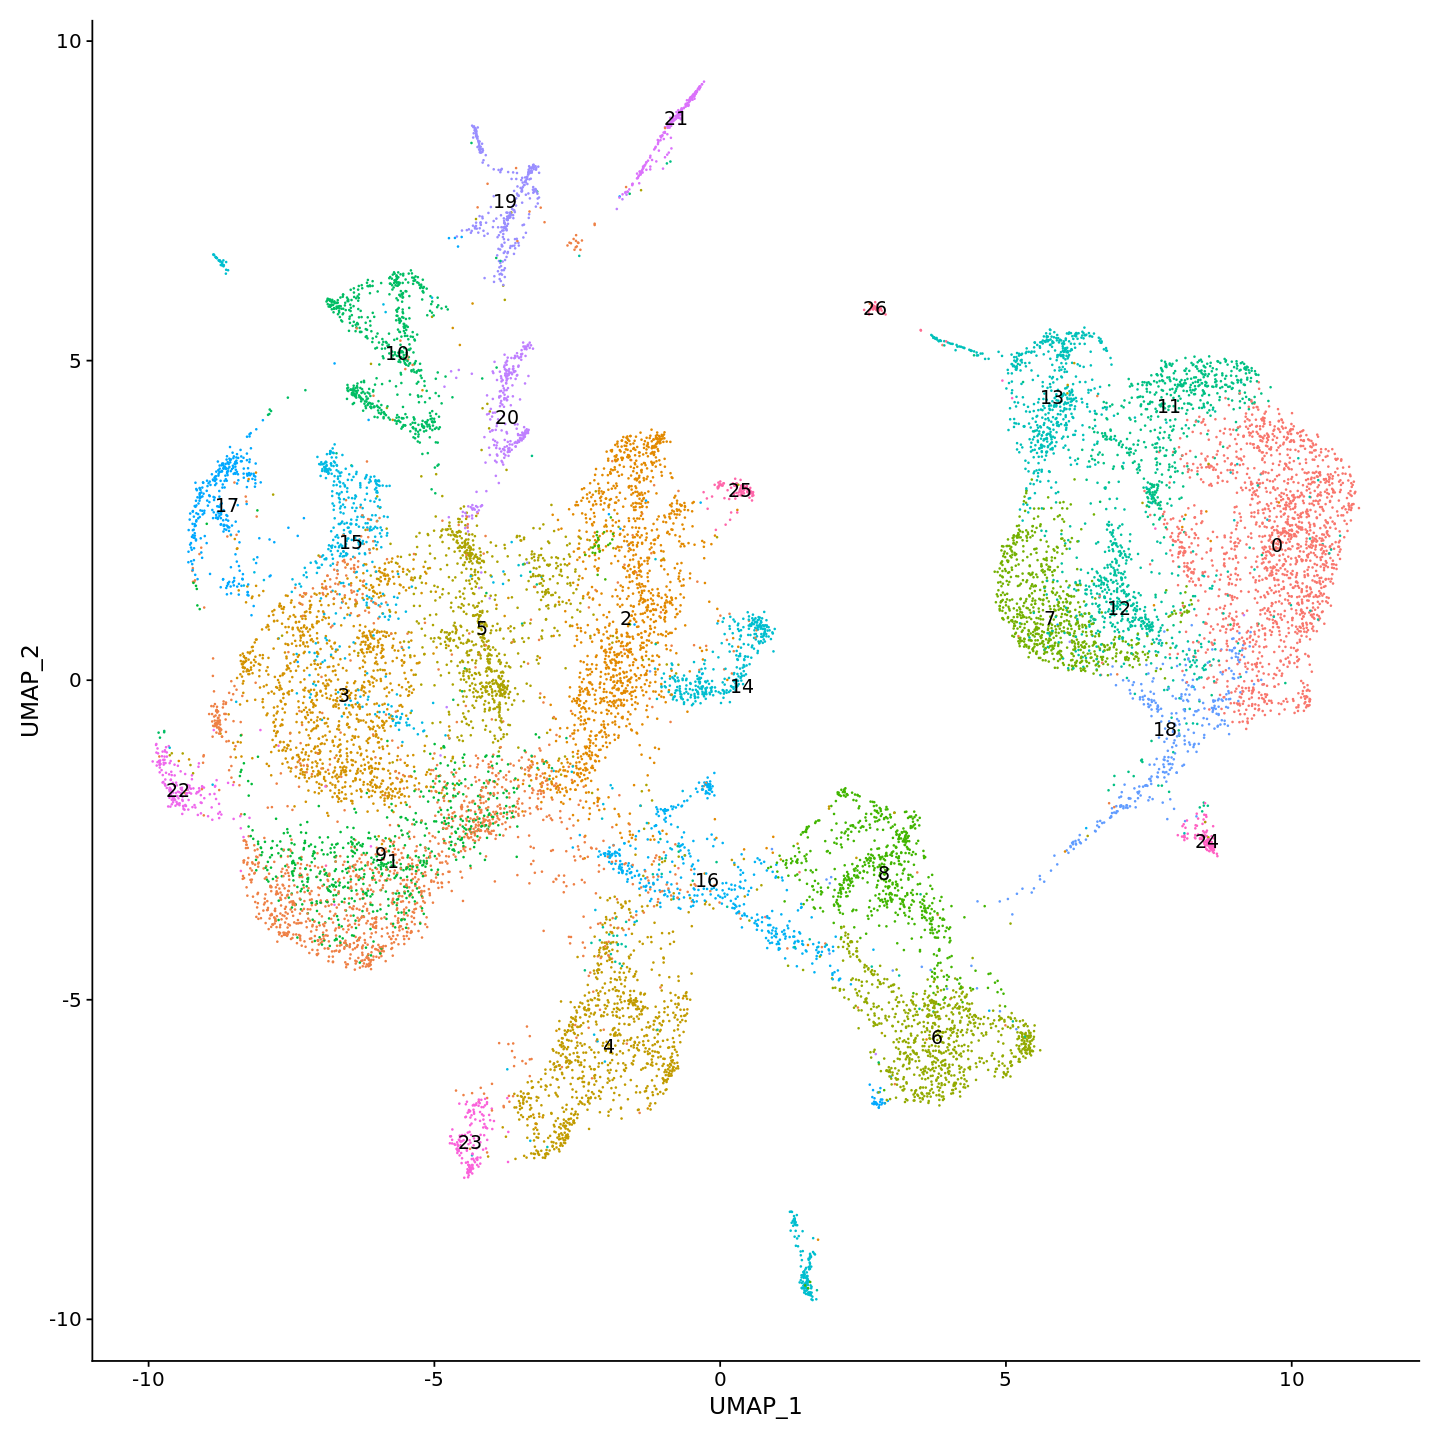

In [34]:
options(repr.plot.width=12, repr.plot.height=12)
DimPlot(wt_sct, label = TRUE) + NoLegend()

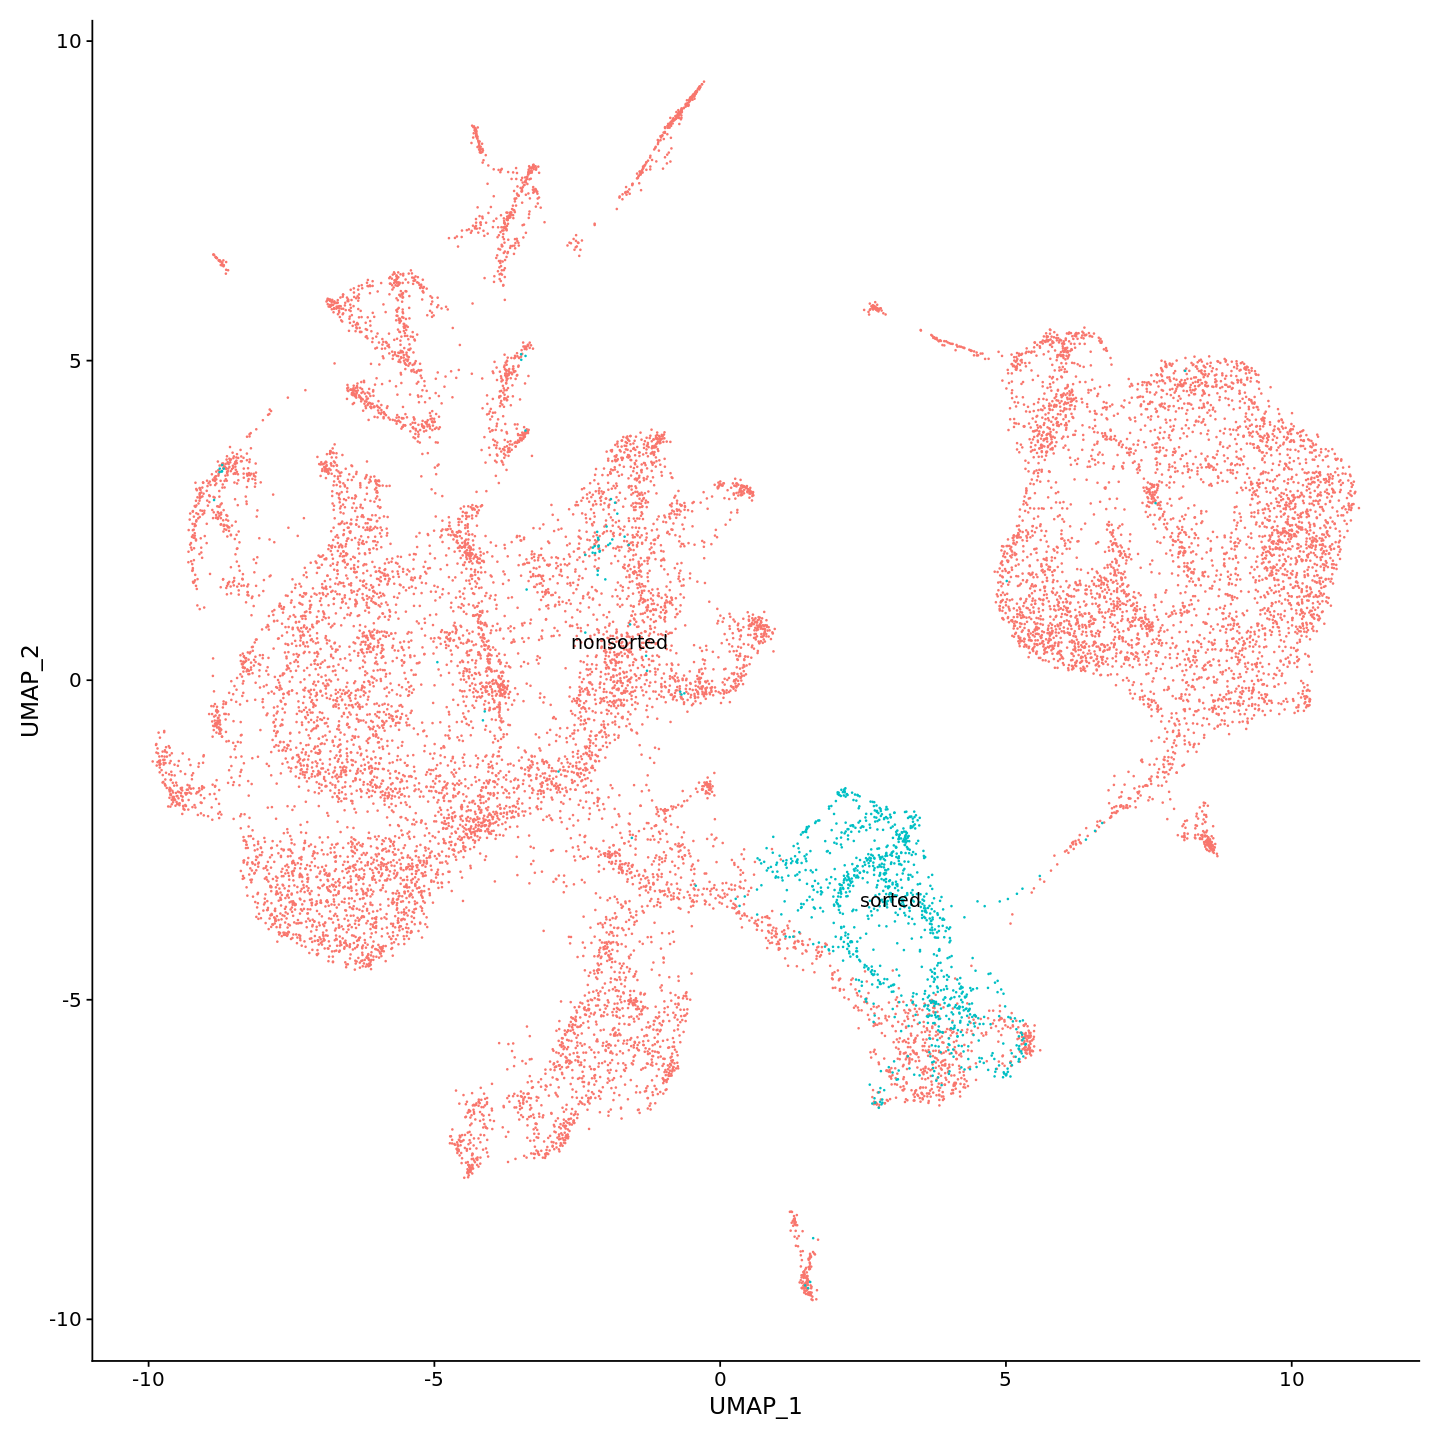

In [35]:
Idents(wt_sct) <- "experiment"
DimPlot(wt_sct, label = TRUE) + NoLegend()

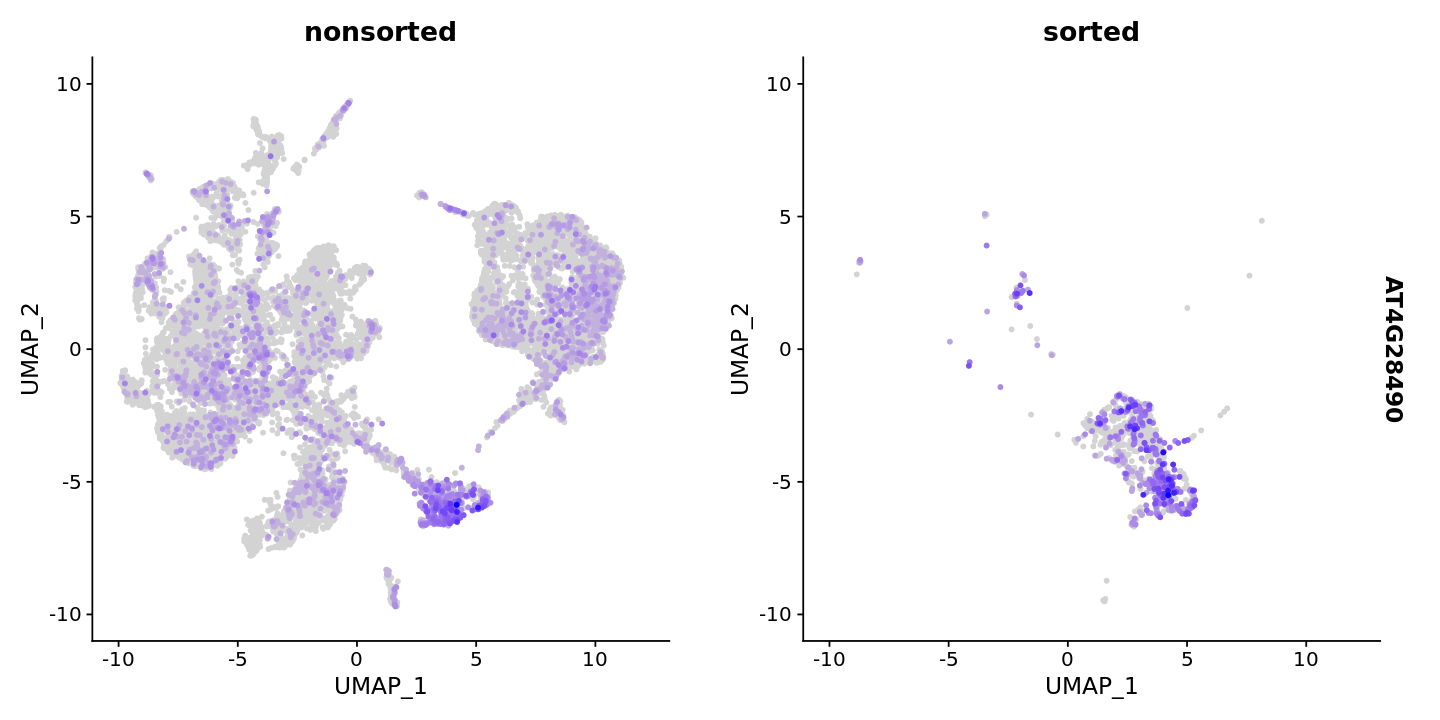

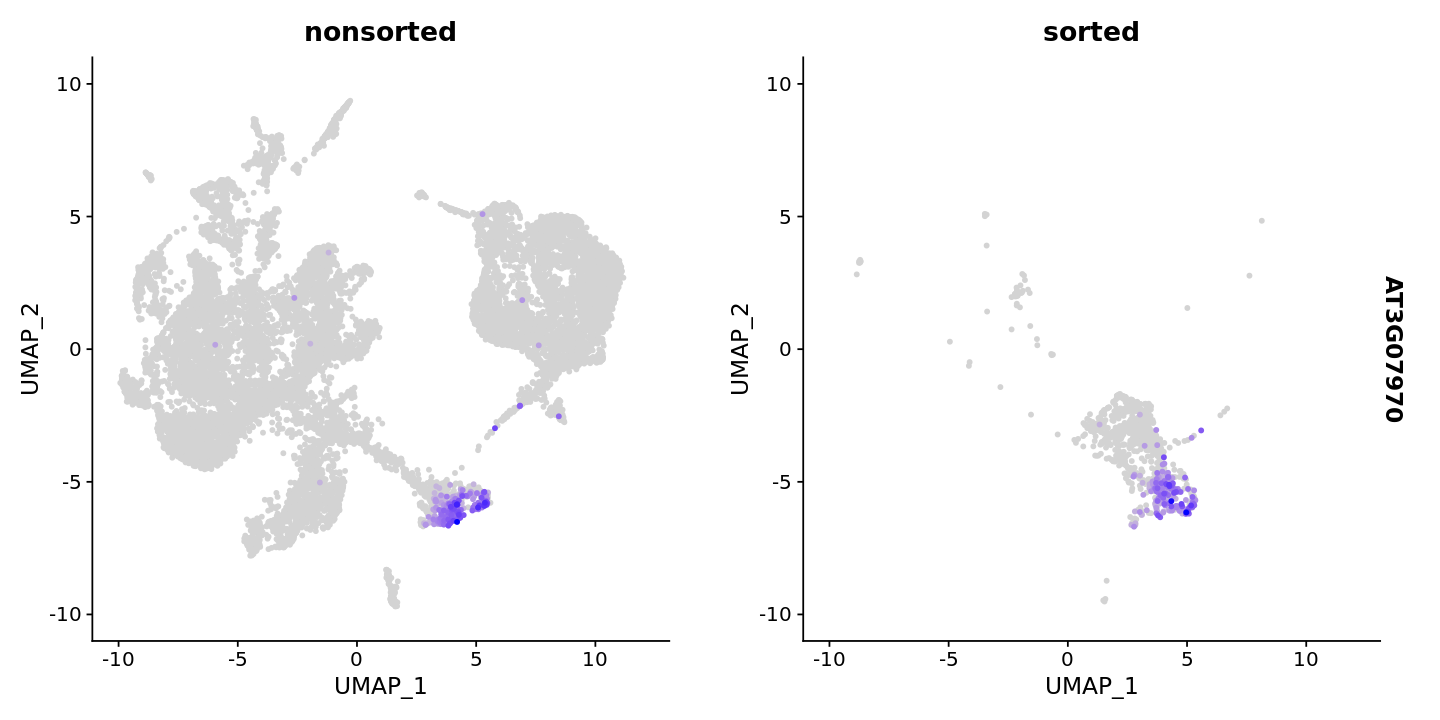

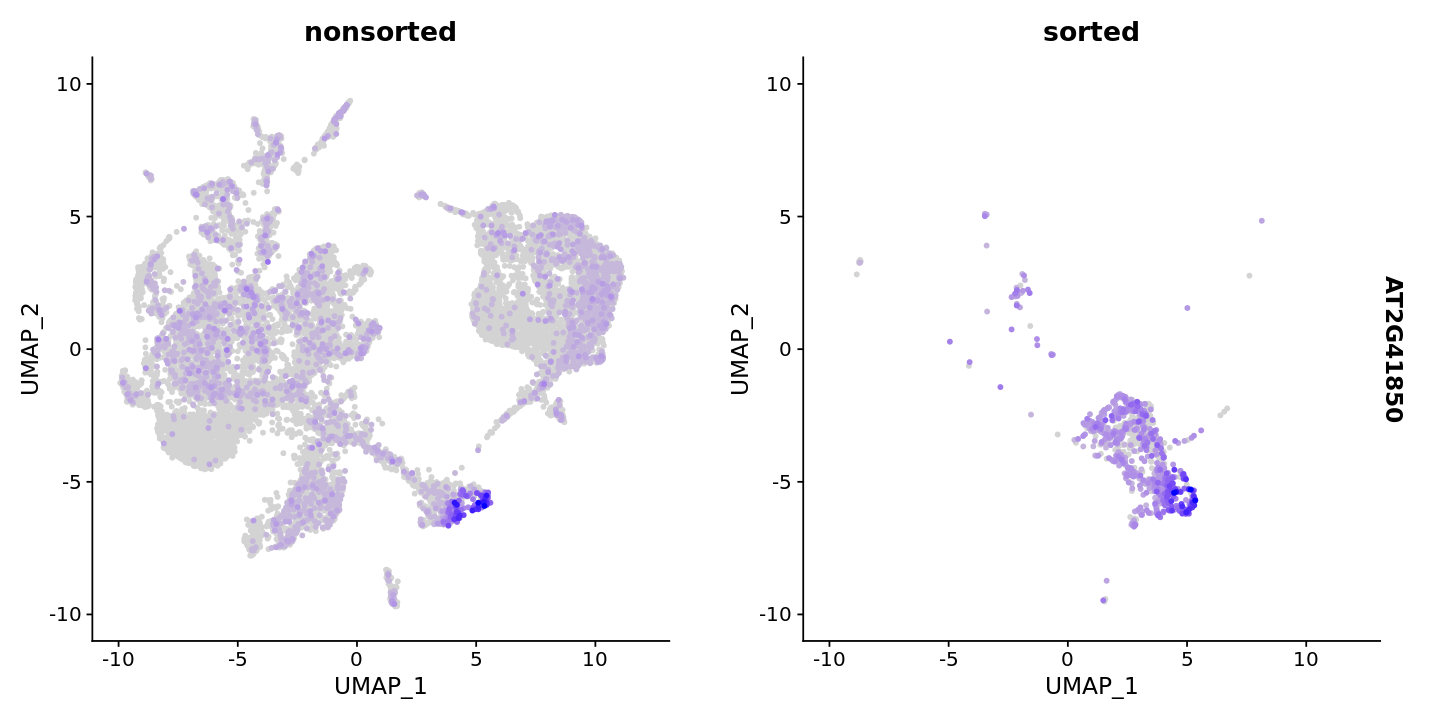

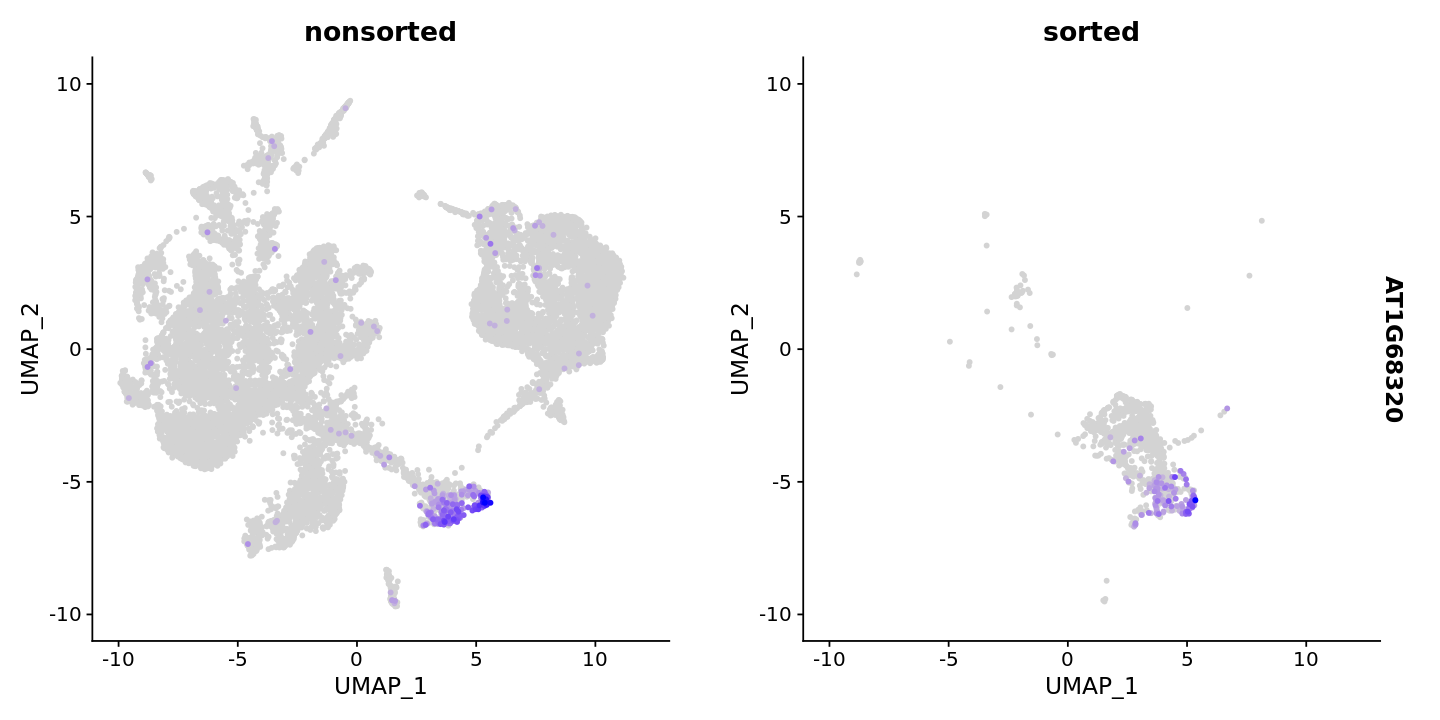

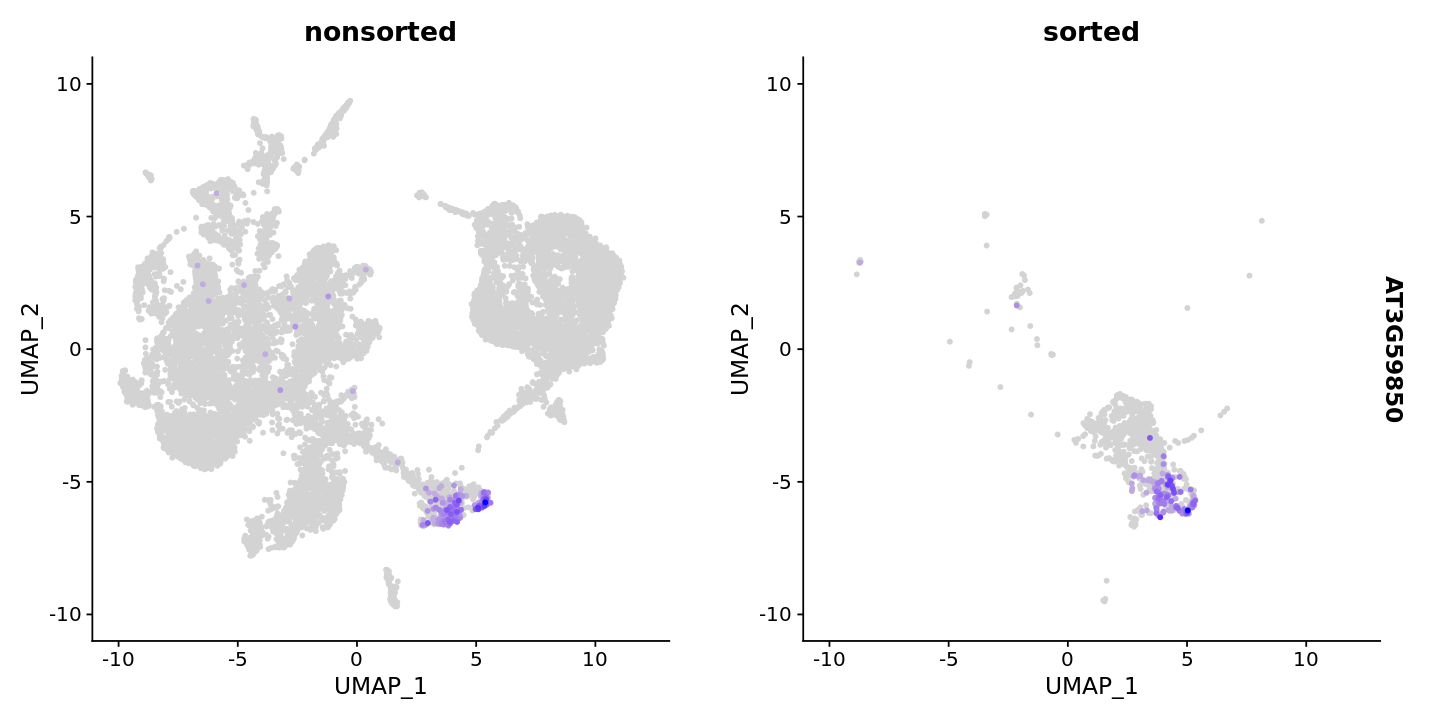

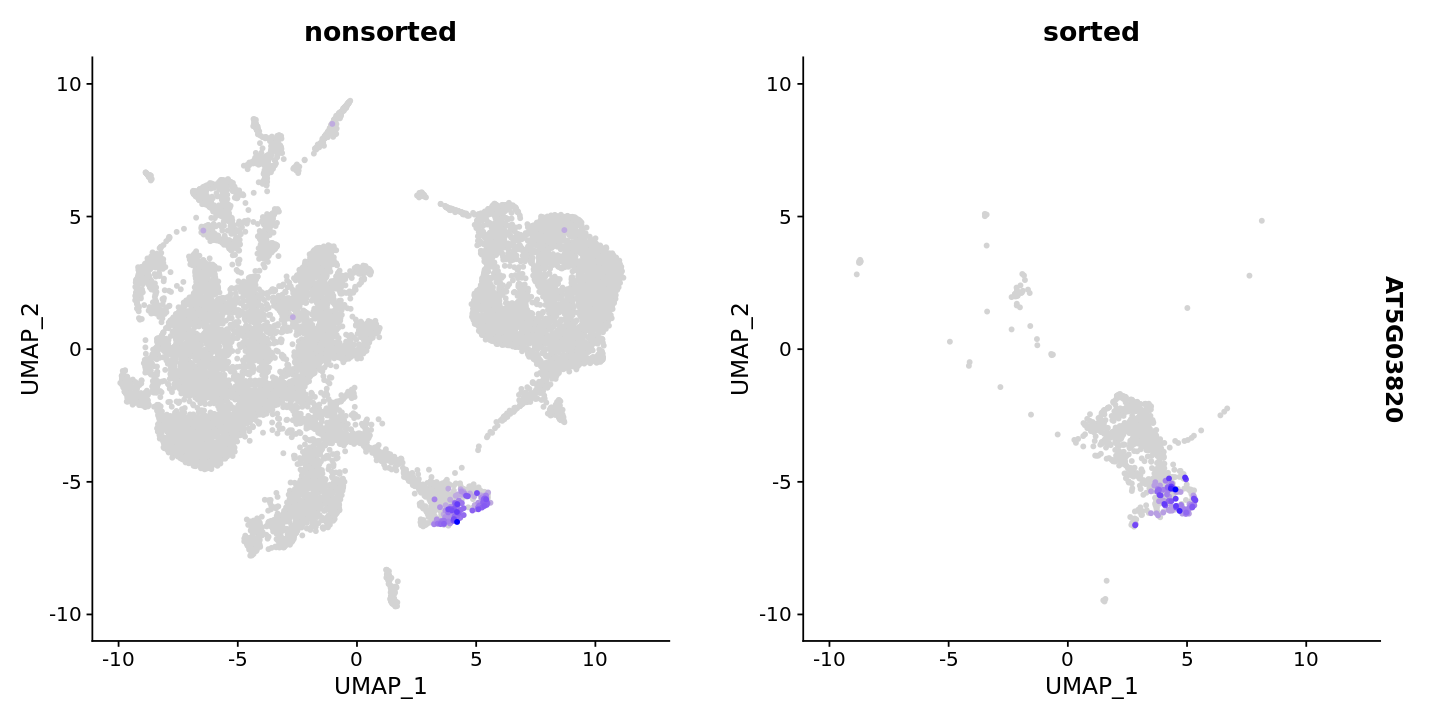

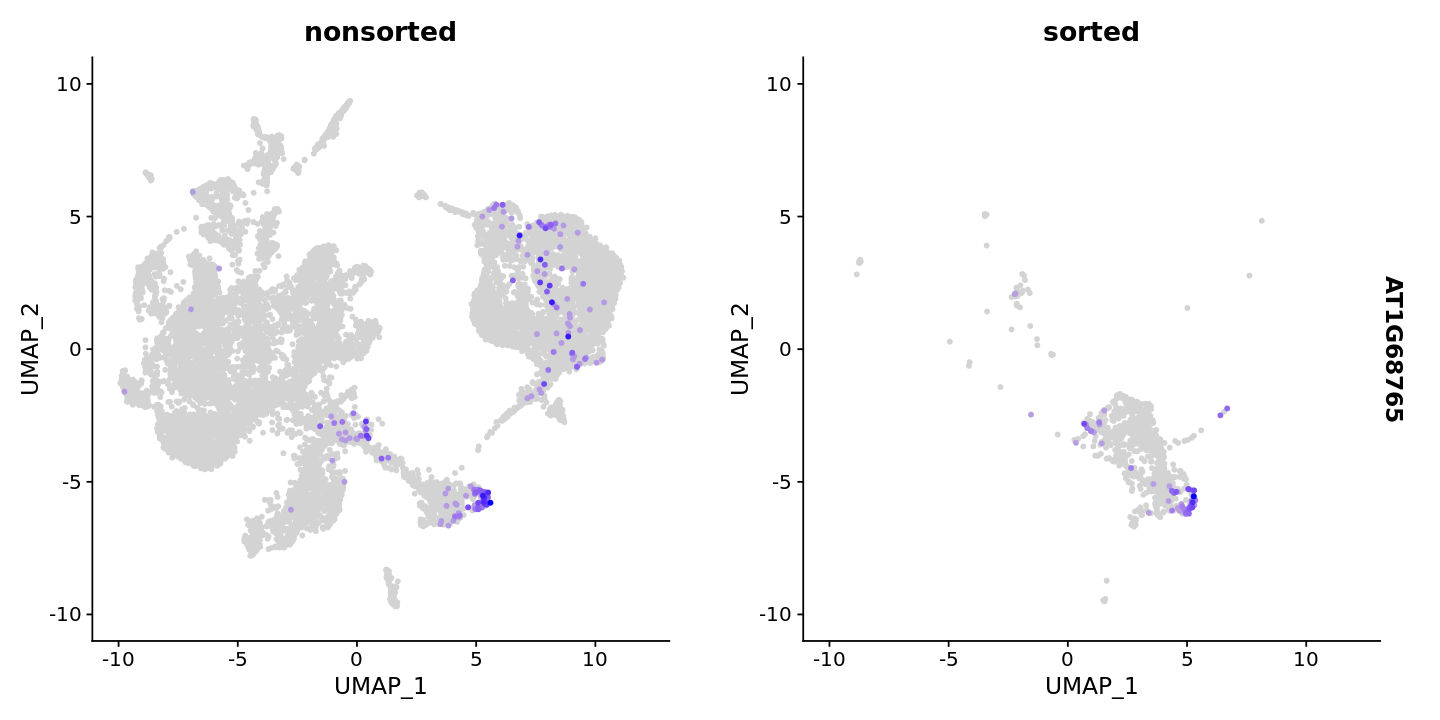

In [41]:
options(repr.plot.width=12, repr.plot.height=6)
#haesa
FeaturePlot(wt_sct, features = c("AT4G28490"),  pt.size = 1, order = TRUE, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")

#qrt2
FeaturePlot(wt_sct, features = c("AT3G07970"),   pt.size = 1, order = TRUE, split.by = "experiment")# + scale_colour_gradient(low = "gray94", high = "red", space = "Lab", na.value = "grey50", guide = "colourbar",aesthetics = "colour")


#pgazat
FeaturePlot(wt_sct, features = c("AT2G41850"),  pt.size = 1, order = TRUE, split.by = "experiment")#, split.by = "geno")#, slot = "data")

#myb62
FeaturePlot(wt_sct, features = c("AT1G68320"),  pt.size = 1, order = TRUE, split.by = "experiment")#, split.by = "geno")#, slot = "data")

#ppg
FeaturePlot(wt_sct, features = c("AT3G59850"),  pt.size = 1, order = TRUE, split.by = "experiment")#, split.by = "geno")#, slot = "data")

#gdsl
FeaturePlot(wt_sct, features = c("AT5G03820"),  pt.size = 1, order = TRUE, split.by = "experiment")#, split.by = "geno")#, slot = "data")

#ida
FeaturePlot(wt_sct, features = c("AT1G68765"),  pt.size = 1, order = TRUE, split.by = "experiment")#, split.by = "geno")#, slot = "data")
